***Syntax natürlicher Sprachen, WS 2022/23***

---
# Übung 7

In [1]:
import nltk
from nltk import Tree

In [2]:
def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            tree = Tree.fromstring(str(tree).replace(", ",","))
            #tree.pretty_print(unicodelines=True)
            display(tree)
            analyzed = True
        if not analyzed:
            print(">> Keine Analyse möglich")

---
## Aufgabe 1 : FCFG: Kongruenz in Nominalphrasen

#### Orientieren Sie sich an folgender Tabelle zur Mehrdeutigkeit der Formen des bestimmen Artikels im Deutschen und passen Sie die Grammatik unten so an, dass sie nur noch grammatikalisch korrekte Nominalphrasen als Teil von Sätzen akzeptiert. Konzentrieren Sie sich auf die Kongruenz von Artikel und Nomen im Genus.

|Form|mögliche Merkmale|
|----|-----------------|
|der|[NUM=sg, GEN=mask, CASE=nom]|
|&nbsp;|[NUM=sg, GEN=fem, CASE=dat]|
|&nbsp;|[NUM=sg, GEN=fem, CASE=GEN]|
|&nbsp;|[NUM=pl, CASE=GEN]|
|die|[NUM=sg, GEN=fem, CASE=nom]|
|&nbsp;|[NUM=sg, GEN=fem, CASE=akk]|
|&nbsp;|[NUM=pl, CASE=nom]|
|&nbsp;|[NUM=pl, CASE=akk]|
|das|[NUM=sg, GEN=neut, CASE=nom]|
|&nbsp;|[NUM=sg, GEN=neut, CASE=akk]|

In [3]:
grammar = """
S -> NP VP

NP -> DET NOM
NOM -> N
VP -> V NP NP | V NP | V

DET -> "der" | "die" | "das"
N -> "Mann" | "Frau" | "Buch"

V -> "gibt" | "schenkt" | "schlaeft" | "gefaellt" | "kennt"
"""

In [4]:
pos_sentences = ["der Mann schlaeft"]
neg_sentences = ["das Mann schlaeft"]

Satz 1: das Mann schlaeft


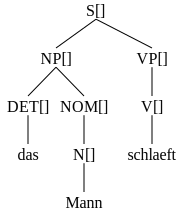

In [5]:
test_grammar(grammar, neg_sentences)

Satz 1: der Mann schlaeft


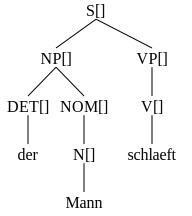

In [6]:
test_grammar(grammar, pos_sentences)

#### Optional können Sie auch folgende NP-Grammatik, die die Features aus der Tabelle oben enthält, um syntaktische Constraints erweitern und testen:

In [ ]:
grammar = """

NP -> DET NOM
NOM -> N

DET[AGR=[NUM=sg, GEN=mask, CASE=nom]] -> "der"
DET[AGR=[NUM=sg, GEN=fem, CASE=dat]] -> "der"
DET[AGR=[NUM=sg, GEN=fem, CASE=gen]] -> "der"
DET[AGR=[NUM=pl, CASE=gen]] -> "der"
DET[AGR=[NUM=sg, GEN=fem, CASE=nom]] -> "die"
DET[AGR=[NUM=sg, GEN=fem, CASE=akk]] -> "die"
DET[AGR=[NUM=pl, CASE=nom]] -> "die"
DET[AGR=[NUM=pl, CASE=akk]] -> "die"
DET[AGR=[NUM=sg, GEN=neut, CASE=nom]] -> "das"
DET[AGR=[NUM=sg, GEN=neut, CASE=akk]] -> "das"

N -> "Mann"
N -> "Frau"
N -> "Buch"
"""

In [ ]:
pos_sg_NPs = ["der Mann", "der Frau", "die Frau", "das Buch"]
neg_sg_NPs = ["das Mann", "die Mann", "das Frau", "der Buch", "die Buch"]

In [ ]:
test_grammar(grammar, neg_sg_NPs)

In [ ]:
test_grammar(grammar, pos_sg_NPs)

---
## Aufgabe 2: FCFG: Kasus und Subkategorisierung

#### Als nächstes sollen Kasusbedingungen in die Grammatik integriert werden (fügen Sie ggf. neue lexikalische Regeln für die Beispielsätze hinzu):

1. Es gibt nur eine Nominalphrase im Nominativ (Subjekt).
1. Je nach Valenzstellen des Verbes sollen nur Nominalphrasen in den korrekten Kasus akzeptiert werden.
1. *Optional:* Versuchen Sie die freie Satzstellung des Deutschen zu berücksichtigen. (Sie können dazu die VP-Struktur auflösen, also flachere Satzregeln verwenden, und ein zusätzliches SBJCASE-Merkmal verwenden.)

In [ ]:
pos_sentences = [   
    "das Buch gefaellt der Frau",
    "das Buch kennt die Frau",
    "der Mann gibt der Frau das Buch"
]

neg_sentences = [
    "das Mann schlaeft",
    "der Mann schlaeft das Buch",  #Verletzung Subkategorisierung-Constraint
    "die Frau gefaellt das Buch",  #Verletzung Objektkasus-Constraint
    "den Mann schlaeft",  #Verletzung Subjektkasus-Constraint
    "die Frau gibt das Buch"  #Verletzung Subkategorisierung-Constraint
]

In [ ]:
grammar = """

BITTE NACH BEARBEITUNG VON (1) VON OBEN KOPIEREN

"""

In [ ]:
test_grammar(grammar, neg_sentences)

In [ ]:
test_grammar(grammar, pos_sentences)

#### Testsätze für invertierte Wortstellung (Bedingung 3):

In [ ]:
pos_inv_sentences = [
    "den Mann kennt die Frau",
    "die Frau kennt der Mann",
    "der Frau gibt der Mann das Buch",
    "das Buch gibt der Mann der Frau"
]

In [ ]:
grammar = """

"""

In [ ]:
test_grammar(grammar, pos_inv_sentences)

In [ ]:
test_grammar(grammar, neg_sentences)

In [ ]:
test_grammar(grammar, pos_sentences)

---
## Aufgabe 3: Plural-Agreement für Subjekt und Verb

#### Ergänzen Sie die Grammatik um die Möglichkeit, das Subjekt in den Plural zu setzen.

#### Dafür müssen Sie folgendes tun:
  1. Erstellen Sie lexikalische Regeln für Pluralformen der Verben und Substantive (Nominativ ist ausreichend.).
  1. Vervollständigen Sie die lexikalischen Regeln für die Form des Artikels *die* um die korrekte Merkmalstruktur für den Plural.
  1. Formulieren Sie eine Kongruenzbedingung in Numerus zwischen Verb und Subjekt.

In [ ]:
pos_sentences = [   
    "das Buch gefaellt der Frau",
    "das Buch kennt die Frau",
    "der Mann gibt der Frau das Buch",
    
    "die Maenner geben der Frau das Buch",
    "die Bücher gefallen der Frau",
    "die Frauen schlafen"
]


neg_sentences = [
    "das Mann schlaeft",
    "der Mann schlaeft das Buch",
    "die Frau gefaellt das Buch",
    "den Mann schlaeft",
    "die Frau gibt das Buch",
    
    "der Mann geben der Frau das Buch",
    "das Buch gefaellt der Frauen",
    "die Frauen schlaeft"
]

In [ ]:
grammar = """

BITTE NACH BEARBEITUNG VON (2) VON OBEN KOPIEREN

"""

In [ ]:
test_grammar(grammar, pos_sentences)

In [ ]:
test_grammar(grammar, neg_sentences)

--- 
# Hausaufgaben

---
## Aufgabe 4: Adverben und Verbzweitstellung

#### Fügen Sie der Grammatik jetzt die zwei Adverben *heute* und *morgen* hinzu. Adverben können prinzipiell sehr frei im Satz platziert werden. Eine Besonderheit des Deutschen ist aber die sog. Verbzweitstellung, wie sie z. B. in Sätzen wie *Heute schlaeft der Mann* deutlich wird.
#### Versuchen Sie alle Möglichkeiten zu implementieren:

In [ ]:
grammar = """

BITTE NACH BEARBEITUNG VON (3) VON OBEN KOPIEREN

"""

In [ ]:
pos_sentences = [
  "heute gibt der Mann der Frau das Buch",
  "der Mann gibt heute der Frau das Buch",
  "der Mann gibt der Frau heute das Buch",
  "der Mann gibt der Frau das Buch heute"
]

neg_sentences = [
    "heute der Mann gibt der Frau das Buch"
]

In [ ]:
test_grammar(grammar, pos_sentences)

In [ ]:
test_grammar(grammar, neg_sentences)